In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\kimtp\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
(train_images, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

In [6]:
class_name = ['T-shirst/top', 'Trouser','Pullover','Dress','Coat',
              'Sandal','Shirst','Sneakers','Bag','Ankle Boots']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_labels.shape

(60000,)

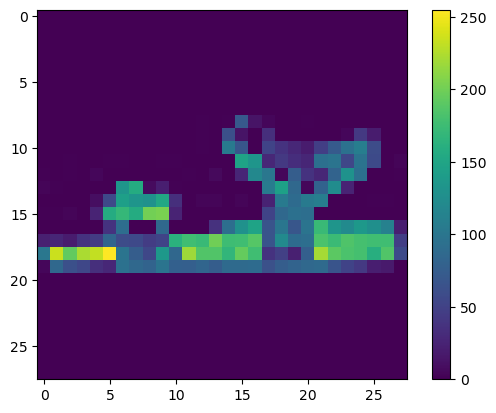

In [10]:
plt.figure()
plt.imshow(train_images[59999])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_image = test_image / 255.0

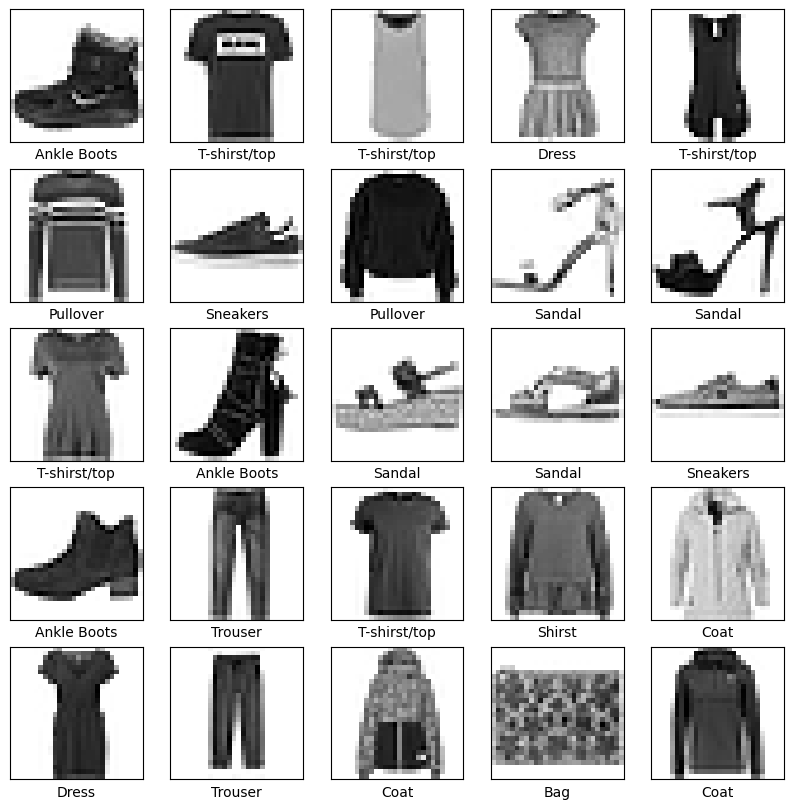

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)
## loss 가 점점 더떨어져야지 accuracy 가올라간다 

Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3705 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8918


In [16]:
test_loss, test_acc = model.evaluate(test_image, test_labels, verbose=2)
print('정확도 : ', test_acc)

313/313 - 0s - loss: 0.3416 - accuracy: 0.8767 - 426ms/epoch - 1ms/step
정확도 :  0.8766999840736389


In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = model.predict(test_image)

313/313 [==============================] - 0s 1ms/step


In [18]:
predictions

array([[1.4152372e-05, 1.2193023e-07, 4.4103381e-08, ..., 4.9785074e-02,
        3.4622808e-05, 9.1436005e-01],
       [9.6574395e-06, 9.0122021e-10, 9.9445641e-01, ..., 1.3302337e-13,
        4.1618168e-08, 9.6795532e-13],
       [1.0409821e-06, 9.9999893e-01, 1.1545352e-09, ..., 2.0252460e-15,
        3.9582129e-11, 2.5070264e-14],
       ...,
       [1.9090291e-04, 1.0228260e-08, 3.1249157e-05, ..., 1.8421282e-06,
        9.9957460e-01, 1.2463118e-10],
       [8.8842535e-07, 9.9994922e-01, 7.8592359e-09, ..., 2.2506910e-13,
        5.2606537e-09, 1.2874171e-09],
       [1.9828361e-05, 9.0229484e-08, 1.4024295e-05, ..., 4.2731101e-03,
        4.7958558e-04, 1.3807290e-05]], dtype=float32)

In [19]:
predictions[0]

array([1.4152372e-05, 1.2193023e-07, 4.4103381e-08, 7.9096289e-08,
       6.6008297e-08, 3.5803881e-02, 1.9064495e-06, 4.9785074e-02,
       3.4622808e-05, 9.1436005e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                       class_name[true_label]),
                                       color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel(class_name)
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


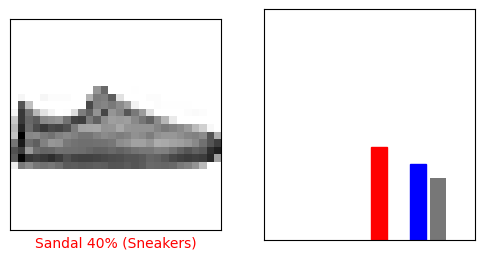

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

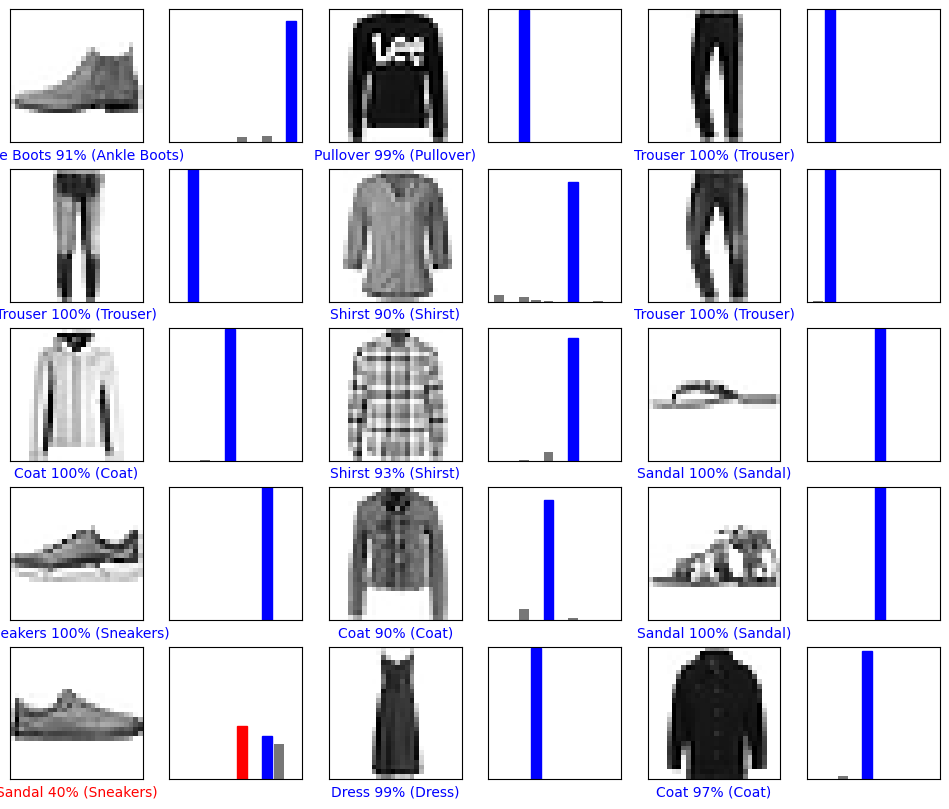

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions, test_labels)
plt.show()

In [32]:
img = test_image[0]

In [33]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
img = (np.expand_dims(img,0))

In [35]:
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 48ms/step
[[0.08633668 0.08633547 0.08633547 0.08633547 0.08633547 0.08948261
  0.08633562 0.09074248 0.08633845 0.21542235]]


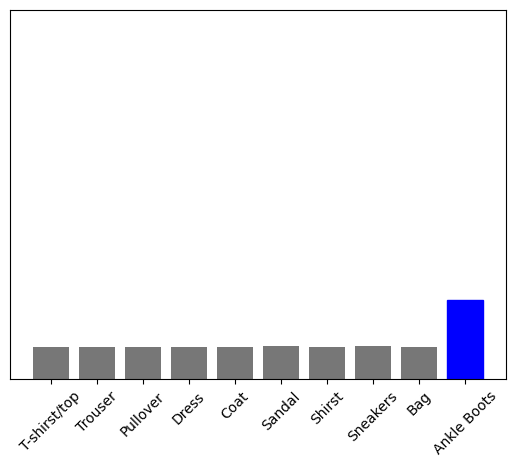

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)